In [13]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import neighbors, datasets, svm

# Load dataset
iris = datasets.load_iris()
X = iris.data  # All features
y = iris.target  # Labels

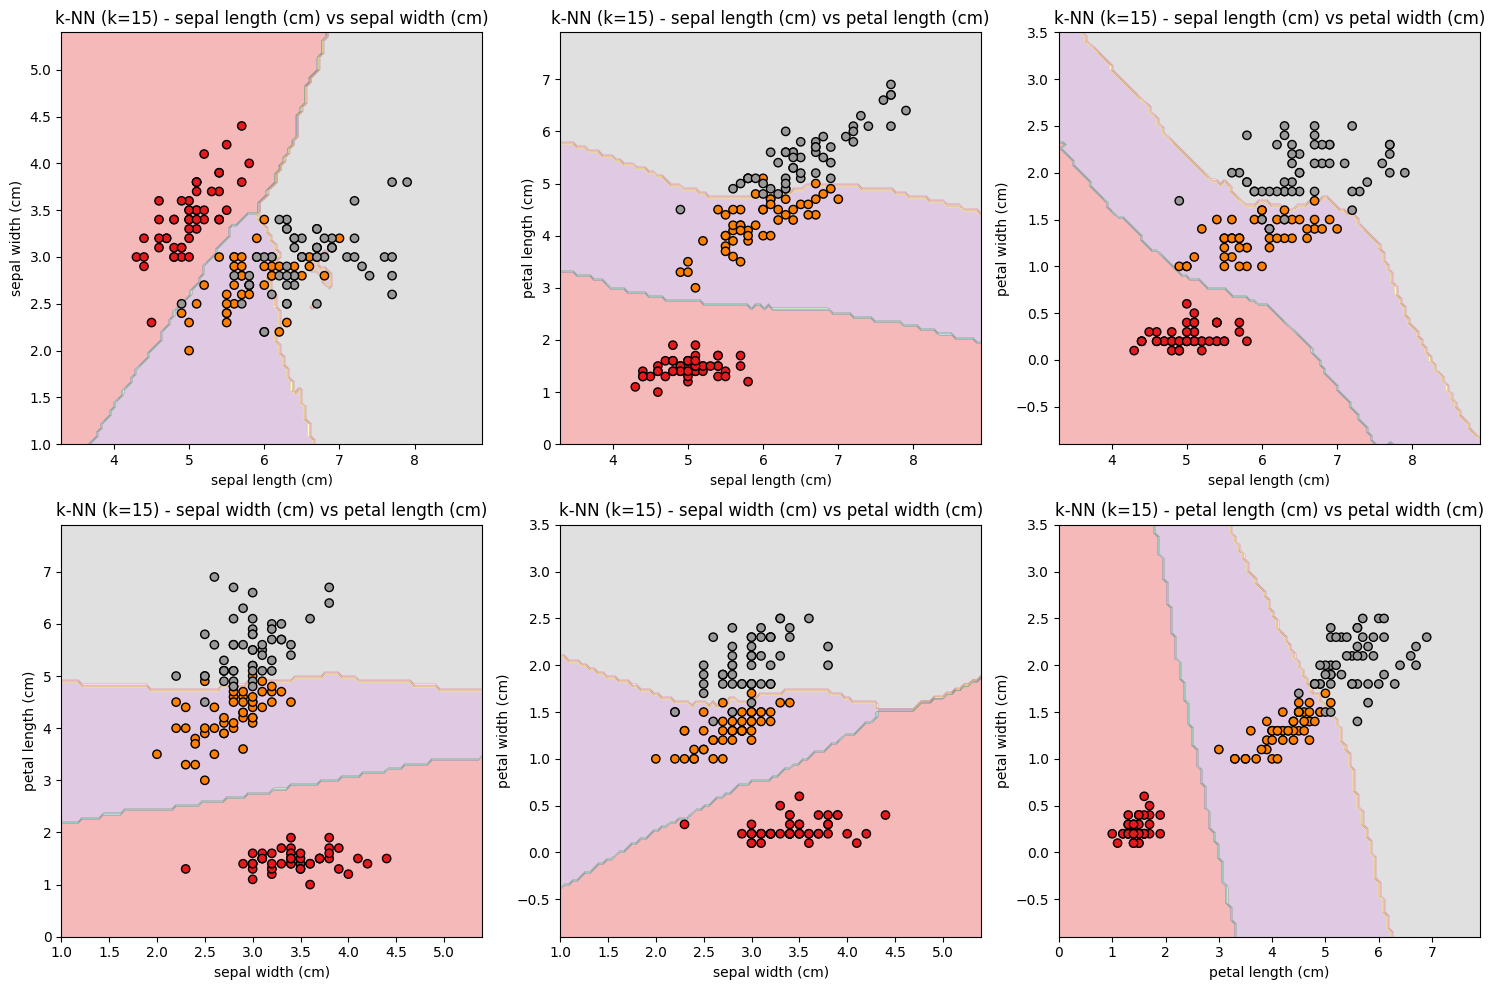

In [14]:
# Function to plot decision boundary for two features at a time
def plot_decision_boundary(X, y, feature1, feature2, ax):
    # Select two features
    X_plot = X[:, [feature1, feature2]]

    # Train a k-NN classifier only on these two features
    clf = neighbors.KNeighborsClassifier(n_neighbors=15)
    clf.fit(X_plot, y)

    # Create a meshgrid
    x_min, x_max = X_plot[:, 0].min() - 1, X_plot[:, 0].max() + 1
    y_min, y_max = X_plot[:, 1].min() - 1, X_plot[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                         np.linspace(y_min, y_max, 100))
    
    # Predict on the meshgrid
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot the decision boundary
    ax.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.Set1)
    ax.scatter(X_plot[:, 0], X_plot[:, 1], c=y, edgecolor='k', cmap=plt.cm.Set1)
    ax.set_xlabel(iris.feature_names[feature1])
    ax.set_ylabel(iris.feature_names[feature2])
    ax.set_title(f"k-NN (k=15) - {iris.feature_names[feature1]} vs {iris.feature_names[feature2]}")

# Plot decision boundaries for different feature pairs
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

feature_pairs = [(0, 1), (0, 2), (0, 3), (1, 2), (1, 3), (2, 3)]
for i, (feature1, feature2) in enumerate(feature_pairs):
    plot_decision_boundary(X, y, feature1, feature2, axes[i // 3, i % 3])

plt.tight_layout()
plt.show()

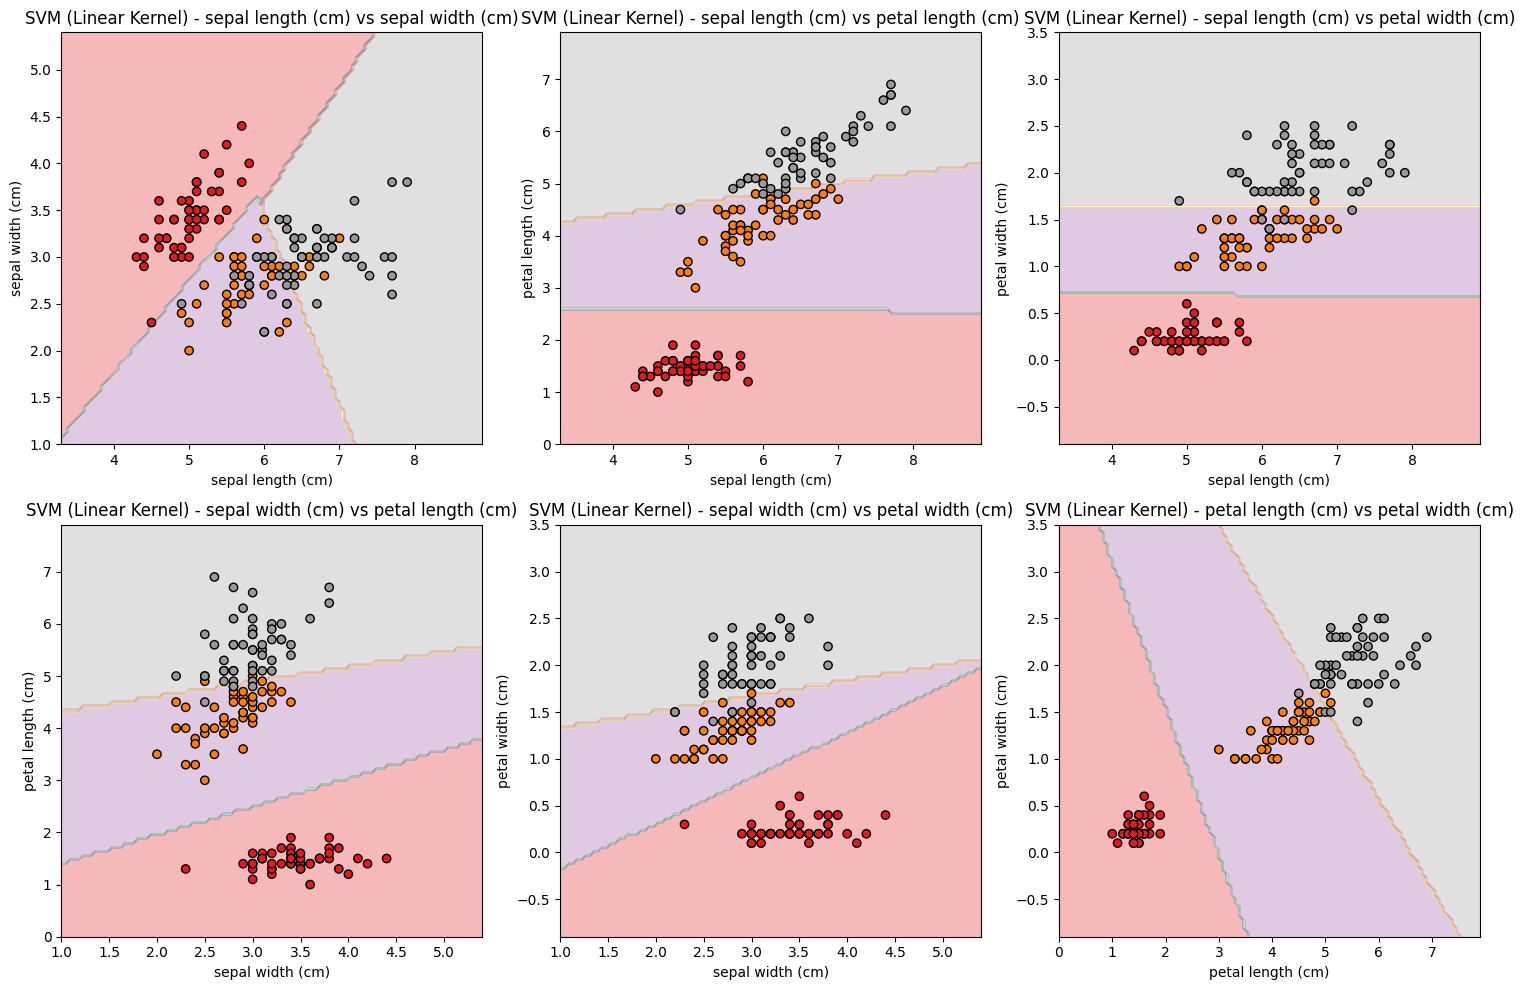

In [15]:
# Function to plot decision boundary for two features at a time
def plot_decision_boundary(X, y, feature1, feature2, ax):
    # Select two features
    X_plot = X[:, [feature1, feature2]]

    # Train an SVM classifier only on these two features
    clf = svm.SVC(kernel='linear')
    clf.fit(X_plot, y)

    # Create a meshgrid
    x_min, x_max = X_plot[:, 0].min() - 1, X_plot[:, 0].max() + 1
    y_min, y_max = X_plot[:, 1].min() - 1, X_plot[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                         np.linspace(y_min, y_max, 100))
    
    # Predict on the meshgrid
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot the decision boundary
    ax.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.Set1)
    ax.scatter(X_plot[:, 0], X_plot[:, 1], c=y, edgecolor='k', cmap=plt.cm.Set1)
    ax.set_xlabel(iris.feature_names[feature1])
    ax.set_ylabel(iris.feature_names[feature2])
    ax.set_title(f"SVM (Linear Kernel) - {iris.feature_names[feature1]} vs {iris.feature_names[feature2]}")

# Plot decision boundaries for different feature pairs
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

feature_pairs = [(0, 1), (0, 2), (0, 3), (1, 2), (1, 3), (2, 3)]
for i, (feature1, feature2) in enumerate(feature_pairs):
    plot_decision_boundary(X, y, feature1, feature2, axes[i // 3, i % 3])

plt.tight_layout()
plt.show()
